<function matplotlib.pyplot.show(close=None, block=None)>

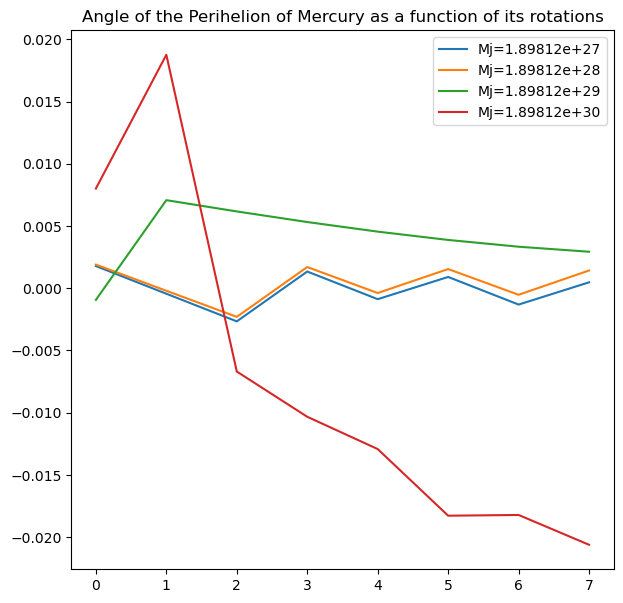

In [1]:
#######################################################################################
# Problem Description:

# In our discussion of the precession of the perihelion of Mercury we mentioned that
# the other planets cause most of the precession. As the largest planet,
# Jupiter is responsible for most of this. Calculate the precession of the perihelion
# of Mercury due to Jupiter. We suggest that you perform the calculation by giving
# Jupiter a mass that is much larger than its true value, and then extrapolate to
# obtain the final result
#######################################################################################

from numpy import array,zeros_like,argmin,sqrt,arctan2
from math import cos,sin,pi
from matplotlib import pyplot as plt

class planet:
    # initialize the class, including setting initial positions and velocities according to Keplar's laws
    def __init__(self,mass,a,e,θ):
        self.m = mass
        
        r0 = a*(1-e**2)/(1+e*cos(θ))
        self.r = array([r0*cos(θ),r0*sin(θ)])
        
        v0 = sqrt(G*MSun*(1+e)/(a*(1-e)))
        self.v = array([-v0*sin(θ),v0*cos(θ)])
        
    # update the planet's position and velocity for one time step dt. Using the leapfrom method
    def timeStep(self,planet2):
        dx = self.r[0] - planet2.r[0]
        dy = self.r[1] - planet2.r[1]
        dist2S = sqrt(self.r[0]**2 + self.r[1]**2)
        dist2O = sqrt(dx**2 + dy**2)
        a = -G*array([self.r[0],self.r[1]]) * ( MSun/dist2S**3*(1+α/dist2S**2) + planet2.m/dist2O**3*(1+α/dist2O**2) )
        
        vHalf = self.v + a*dt/2
        self.r += vHalf*dt
        
        dx = self.r[0] - planet2.r[0]
        dy = self.r[1] - planet2.r[1]
        dist2S = sqrt(self.r[0]**2 + self.r[1]**2)
        dist2O = sqrt(dx**2 + dy**2)
        aNext = -G*array([self.r[0],self.r[1]]) * ( MSun/dist2S**3*(1+α/dist2S**2) + planet2.m/dist2O**3*(1+α/dist2O**2) )
        
        self.v = vHalf + aNext*dt/2
        
        return self.r
    
# get the angle of the x and y values that have the smallest distance to the Sun
def getPerAngle(xvals,yvals):
    dists = zeros_like(len(xvals))   # initialize an array of distances
    dists = sqrt(xvals**2 + yvals**2)   # fill up the array
    idx = argmin(dists)   # get the index of the values with the minimum distance from the sun
    return arctan2(yvals[idx], xvals[idx])   # calculate the corresponding angle (in radians) and return it

# passing the mass of Jupiter an an argument, return a list of perihelion angles in radians
def getPrecessionRate(MJupiter):
    MSun = 1.9891e30 # mass of sun
    G = 4*pi**2/MSun # univeral gravitational constant, AU^3/yr^2
    α = 1.13e-8 # constant for relativity
    dt = 0.0001 # years
    tMax = 2 # years 0.2435 for Mercury orbit

    mercury = planet(3.285e23,0.39,0.206,0)
    jupiter = planet(MJupiter,5.20,0.049,0)

    # vvv Comments like these can be removed to plot the orbit of Mercury and/or Jupiter
    #fig, ax = plt.subplots(1,1,figsize=(7,7))
    tCurrent = 0
    xM = []
    yM = []
    xJ = []
    yJ = []
    perθ = []
    i = 0
    while i < tMax/dt:
        posNext = mercury.timeStep(jupiter)
        xM.append(posNext[0])
        yM.append(posNext[1])

        posNext = jupiter.timeStep(mercury)
        xJ.append(posNext[0])
        yJ.append(posNext[1])

        if i % 2435 == 0 and i != 0:
            perθ.append(getPerAngle(array(xM[-2435:]),array(yM[-2435:])))
            # vvv this line sketches the line between the sun and Mercury's perihelion
            #ax.plot([0,0.307*cos(perθ[-1])],[0,0.307*sin(perθ[-1])],'y')

        i += 1

    #ax.plot(xM,yM,label='Mercury')
    #ax.plot(xJ,yJ,label='Jupiter')
    #plt.show()
    
    return perθ, MJupiter


MSun = 1.9891e30 # mass of sun
G = 4*pi**2/MSun # univeral gravitational constant, AU^3/yr^2
α = 1.13e-8 # constant for relativity
dt = 0.0001 # years
tMax = 2 # years 0.2435 for Mercury orbit
θs1,m1 = getPrecessionRate(1.89812e27)
θs2,m2 = getPrecessionRate(1.89812e28)
θs3,m3 = getPrecessionRate(1.89812e29)
θs4,m4 = getPrecessionRate(1.89812e30)

fig2, ax2 = plt.subplots(1,1,figsize=(7,7))
ax2.plot(array(range(len(θs1))),θs1,label=f'Mj={m1}')
ax2.plot(array(range(len(θs2))),θs2,label=f'Mj={m2}')
ax2.plot(array(range(len(θs3))),θs3,label=f'Mj={m3}')
ax2.plot(array(range(len(θs4))),θs4,label=f'Mj={m4}')
ax2.set_title('Angle of the Perihelion of Mercury as a function of its rotations')
plt.legend()
plt.show